In [18]:
## Install and import packages
!pip install openmeteo-requests
!pip install requests-cache retry-requests

import pandas as pd
import os

## Access Google Drive for dataset
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import seaborn as sns

In [20]:
!pip install squarify

In [21]:
pip install keras


In [22]:
!pip install plotly_express


In [23]:
pip install --upgrade tensorflow


In [24]:
pip install sklearn-keras

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import array
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Activation
from keras import optimizers
from keras.layers import TimeDistributed
from keras.layers import Flatten
from sklearn.metrics import accuracy_score
from keras.datasets import reuters
#from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
#from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
# from keras.layers.convolutional import Conv1D
# from keras.layers.convolutional import MaxPooling1D
from keras.preprocessing import sequence
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from keras.datasets import imdb
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle       # this is added for the rectanfgular plot
from numpy import array
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Input  # this will be used in the CNN model bulding, for example, Input is the first line of the model
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Activation, TimeDistributed, Flatten, LSTM, Dropout, Embedding, Bidirectional
from keras import optimizers
from keras.datasets import reuters, imdb
from keras.utils import to_categorical
from keras.preprocessing import sequence
from sklearn.metrics import accuracy_score

In [26]:
# Special plot that makes the figure bigger
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')

In [27]:
tf.random.set_seed(123)
SEED = 1000

# info dengue sprint epidemiological weekly cases

In [28]:
# five states data
#path = '/content/drive/MyDrive/Colab Notebook/Colab Notebook/infodengue2024/info dengue data and model'
path = '/content/drive/MyDrive/Colab Notebook/infodengue2024/info dengue data and model'
#file = 'five_states_2024_upto_august_all_federal_units_epidemiological_data.csv'
file = 'final_2024_upto_august_all_federal_units_epidemiological_data.csv'
df = pd.read_csv(os.path.join(path, file), low_memory=False)
df

,index,date,epiweek,SC,RS,MS,MT,PA,PB,PE,...,GO,MG,AC,AL,SP,SE,AM,AP,TO,DF
0,1,2010-01-03,201001,14,13,2515,4122,177,12,131,...,5554,2794,869,93,3058,16,191,39,420,147
1,2,2010-01-10,201002,27,17,3063,4130,257,28,147,...,6930,3729,1003,111,3980,22,183,60,450,275
2,3,2010-01-17,201003,23,14,4045,3938,257,26,172,...,7175,4656,1010,176,4869,14,73,39,548,356
3,4,2010-01-24,201004,16,13,4733,3629,268,56,225,...,7317,6195,1397,194,6445,13,100,55,597,461
4,5,2010-01-31,201005,22,22,5135,3287,324,73,321,...,7286,7179,2000,289,8332,8,113,111,607,574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,758,2024-07-07,202428,865,273,63,393,206,178,941,...,1706,1343,29,630,10117,136,85,119,40,274
758,759,2024-07-14,202429,700,278,68,282,187,224,862,...,1225,982,49,557,8195,144,114,108,35,182
759,760,2024-07-21,202430,684,270,78,307,170,204,746,...,960,565,74,584,6748,128,115,55,44,183
760,761,2024-07-28,202431,704,92,89,322,100,210,401,...,755,385,60,330,3243,97,92,25,67,189


# FINAL **CNN-LSTM ensemble using RMSE penalties** model

Shape before reshaping: (25, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regulariz

Print the modified X_pred to verify for 0 of 52
[[[ 6.87000000e+02  0.00000000e+00]]

 [[ 7.97000000e+02  1.00581054e+02]]

 [[ 6.99000000e+02 -1.07648166e+02]]

 [[ 5.22000000e+02 -1.86449619e+02]]

 [[ 6.56000000e+02  1.25259182e+02]]

 [[ 8.19000000e+02  1.53669182e+02]]

 [[ 9.25000000e+02  9.63164824e+01]]

 [[ 9.42000000e+02  7.16793187e+00]]

 [[ 1.23900000e+03  2.87145498e+02]]

 [[ 1.30300000e+03  5.36562346e+01]]

 [[ 1.09700000e+03 -2.16491753e+02]]

 [[ 1.07900000e+03 -2.80762595e+01]]

 [[ 1.01000000e+03 -7.90477060e+01]]

 [[ 1.85200000e+03  8.32053884e+02]]

 [[ 1.93900000e+03  7.45402980e+01]]

 [[ 2.07600000e+03  1.24135700e+02]]

 [[ 2.36300000e+03  2.73463080e+02]]

 [[ 3.01700000e+03  6.38948561e+02]]

 [[ 3.15700000e+03  1.21211160e+02]]

 [[ 3.62600000e+03  4.49386469e+02]]

 [[ 3.64500000e+03 -3.40201813e+00]]

 [[ 3.74200000e+03  7.44843819e+01]]

 [[ 4.08900000e+03  3.23904958e+02]]

 [[ 4.94800000e+03  8.33826743e+02]]

 [[ 5.23900000e+03  2.60672180e+02]]

 [

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regulariz

previous_residuals for 0 of 92
[    0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
   100.58105434  -107.64816627  -186.449619     125.25918168
   153.66918241    96.31648241     7.16793187   287.14549788
    53.65623459  -216.49175284   -28.07625952   -79.04770602
   832.05388421    74.540298     124.13570004   273.46308036
   638.94856124   121.21115964   449.38646883    -3.40201813
    74.4843819    323.90495815   833.82674282   260.67217974
   159.92447529   791.77141812  -566.18369382 -1254.01203075
  -395.69261

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regulariz

Print the modified X_pred to verify for 1 of 52
[[[ 2.15000000e+02  0.00000000e+00]]

 [[ 2.13000000e+02 -3.03642517e+00]]

 [[ 2.15000000e+02  1.02795890e+00]]

 [[ 1.89000000e+02 -2.70364252e+01]]

 [[ 2.09000000e+02  1.98607492e+01]]

 [[ 2.13000000e+02  3.15898968e+00]]

 [[ 1.93000000e+02 -2.09720411e+01]]

 [[ 2.42000000e+02  4.87139179e+01]]

 [[ 2.60000000e+02  1.61615509e+01]]

 [[ 3.12000000e+02  4.96895032e+01]]

 [[ 2.70000000e+02 -4.54504240e+01]]

 [[ 2.83000000e+02  1.04462737e+01]]

 [[ 6.18000000e+02  3.32148366e+02]]

 [[ 5.03000000e+02 -1.22088467e+02]]

 [[ 6.40000000e+02  1.30949098e+02]]

 [[ 9.16000000e+02  2.68732800e+02]]

 [[ 8.65000000e+02 -6.02901448e+01]]

 [[ 8.33000000e+02 -4.09319533e+01]]

 [[ 9.26000000e+02  8.42945794e+01]]

 [[ 7.89000000e+02 -1.46360022e+02]]

 [[ 8.43000000e+02  4.56093453e+01]]

 [[ 1.15600000e+03  3.04223584e+02]]

 [[ 1.37000000e+03  2.03034663e+02]]

 [[ 1.63000000e+03  2.47524818e+02]]

 [[ 1.72100000e+03  7.66615620e+01]]

 [

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regulariz

previous_residuals for 1 of 144
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.00581054e+02 -1.07648166e+02 -1.86449619e+02  1.25259182e+02
  1.53669182e+02  9.63164824e+01  7.16793187e+00  2.87145498e+02
  5.36562346e+01 -2.16491753e+02 -2.80762595e+01 -7.90477060e+01
  8.32053884e+02  7.45402980e+01  1.24135700e+02  2.73463080e+02
  6.38948561e+02  1.21211160e+02  4.49386469e+02 -3.402018

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regulariz

Print the modified X_pred to verify for 2 of 52
[[[ 1.39000000e+02  0.00000000e+00]]

 [[ 1.89000000e+02  4.94126353e+01]]

 [[ 1.89000000e+02 -2.77535214e+00]]

 [[ 2.05000000e+02  1.32246479e+01]]

 [[ 1.60000000e+02 -4.83956788e+01]]

 [[ 2.21000000e+02  5.94461151e+01]]

 [[ 1.72000000e+02 -5.29800039e+01]]

 [[ 1.73000000e+02 -1.07491736e+00]]

 [[ 1.68000000e+02 -7.11731835e+00]]

 [[ 2.04000000e+02  3.40962747e+01]]

 [[ 1.66000000e+02 -4.13579730e+01]]

 [[ 1.12000000e+02 -5.58172053e+01]]

 [[ 1.29000000e+02  1.77612445e+01]]

 [[ 2.68000000e+02  1.38897954e+02]]

 [[ 3.14000000e+02  4.04935523e+01]]

 [[ 4.12000000e+02  9.12369865e+01]]

 [[ 5.83000000e+02  1.62148685e+02]]

 [[ 7.20000000e+02  1.25644218e+02]]

 [[ 6.34000000e+02 -9.89106017e+01]]

 [[ 6.11000000e+02 -3.49583499e+01]]

 [[ 1.03400000e+03  4.11308600e+02]]

 [[ 1.21700000e+03  1.66694576e+02]]

 [[ 1.31600000e+03  8.05742727e+01]]

 [[ 1.41900000e+03  8.33770567e+01]]

 [[ 1.26400000e+03 -1.75899479e+02]]

 [

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regulariz

previous_residuals for 2 of 196
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.00581054e+02 -1.07648166e+02 -1.86449619e+02  1.25259182e+02
  1.53669182e+02  9.63164824e+01  7.16793187e+00  2.87145498e+02
  5.36562346e+01 -2.16491753e+02 -2.80762595e+01 -7.90477060e+01
  8.32053884e+02  7.45402980e+01  1.24135700e+02  2.73463080e+02
  6.38948561e+02  1.21211160e+02  4.49386469e+02 -3.402018

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regulariz

Print the modified X_pred to verify for 3 of 52
[[[ 4.04000000e+02  0.00000000e+00]]

 [[ 3.75000000e+02 -2.67126383e+01]]

 [[ 2.58000000e+02 -1.15198888e+02]]

 [[ 2.64000000e+02  6.22940503e+00]]

 [[ 2.62000000e+02 -1.70773557e+00]]

 [[ 2.27000000e+02 -3.47289379e+01]]

 [[ 2.83000000e+02  5.59446735e+01]]

 [[ 3.35000000e+02  5.25057592e+01]]

 [[ 3.04000000e+02 -2.98108325e+01]]

 [[ 3.03000000e+02 -2.34682671e-01]]

 [[ 2.49000000e+02 -5.32475465e+01]]

 [[ 2.14000000e+02 -3.48604179e+01]]

 [[ 1.54000000e+02 -6.01518060e+01]]

 [[ 1.87000000e+02  3.26583812e+01]]

 [[ 3.67000000e+02  1.79702360e+02]]

 [[ 4.69000000e+02  1.03673149e+02]]

 [[ 6.78000000e+02  2.12498644e+02]]

 [[ 7.15000000e+02  4.53923996e+01]]

 [[ 8.20000000e+02  1.14394836e+02]]

 [[ 8.35000000e+02  2.74192481e+01]]

 [[ 7.66000000e+02 -5.61292705e+01]]

 [[ 5.37000000e+02 -2.18167374e+02]]

 [[ 6.57000000e+02  1.24933691e+02]]

 [[ 7.30000000e+02  8.08398427e+01]]

 [[ 7.82000000e+02  6.18111531e+01]]

 [

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regulariz

previous_residuals for 3 of 248
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.00581054e+02 -1.07648166e+02 -1.86449619e+02  1.25259182e+02
  1.53669182e+02  9.63164824e+01  7.16793187e+00  2.87145498e+02
  5.36562346e+01 -2.16491753e+02 -2.80762595e+01 -7.90477060e+01
  8.32053884e+02  7.45402980e+01  1.24135700e+02  2.73463080e+02
  6.38948561e+02  1.21211160e+02  4.49386469e+02 -3.402018

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regulariz

len(X_pred) is 53 for 4
len(X_pred) is 53 for 4
len(X_pred) is 53 for 4
len(X_pred) is 53 for 4
len(X_pred) is 53 for 4
len(X_pred) is 53 for 4
len(X_pred) is 53 for 4
len(X_pred) is 53 for 4
len(X_pred) is 53 for 4
len(X_pred) is 53 for 4
len(X_pred) is 53 for 4
len(X_pred) is 53 for 4
len(X_pred) is 53 for 4
len(X_pred) is 53 for 4
len(X_pred) is 53 for 4
len(X_pred) is 53 for 4
len(X_pred) is 53 for 4
len(X_pred) is 53 for 4
len(X_pred) is 53 for 4
len(X_pred) is 53 for 4
len(X_pred) is 53 for 4
len(X_pred) is 53 for 4
len(X_pred) is 53 for 4
len(X_pred) is 53 for 4
len(X_pred) is 53 for 4
len(X_pred) is 53 for 4
len(X_pred) is 53 for 4
len(X_pred) is 53 for 4
len(X_pred) is 53 for 4
len(X_pred) is 53 for 4
len(X_pred) is 53 for 4
len(X_pred) is 53 for 4
len(X_pred) is 53 for 4
len(X_pred) is 53 for 4
len(X_pred) is 53 for 4
len(X_pred) is 53 for 4
len(X_pred) is 53 for 4
len(X_pred) is 53 for 4
len(X_pred) is 53 for 4
len(X_pred) is 53 for 4
len(X_pred) is 53 for 4
len(X_pred) is 5

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regulariz

previous_residuals for 4 of 301
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.00581054e+02 -1.07648166e+02 -1.86449619e+02  1.25259182e+02
  1.53669182e+02  9.63164824e+01  7.16793187e+00  2.87145498e+02
  5.36562346e+01 -2.16491753e+02 -2.80762595e+01 -7.90477060e+01
  8.32053884e+02  7.45402980e+01  1.24135700e+02  2.73463080e+02
  6.38948561e+02  1.21211160e+02  4.49386469e+02 -3.402018

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regulariz

Print the modified X_pred to verify for 5 of 52
[[[ 4.00000000e+02  0.00000000e+00]]

 [[ 3.54000000e+02 -4.09115587e+01]]

 [[ 2.66000000e+02 -8.41611358e+01]]

 [[ 2.23000000e+02 -4.15382193e+01]]

 [[ 2.48000000e+02  2.53273706e+01]]

 [[ 3.10000000e+02  6.29833733e+01]]

 [[ 3.21000000e+02  1.36451781e+01]]

 [[ 3.36000000e+02  1.79429806e+01]]

 [[ 4.29000000e+02  9.63498786e+01]]

 [[ 4.47000000e+02  2.38740248e+01]]

 [[ 3.80000000e+02 -6.06399222e+01]]

 [[ 2.70000000e+02 -1.05454576e+02]]

 [[ 1.52000000e+02 -1.16431353e+02]]

 [[ 5.60000000e+02  4.06577620e+02]]

 [[ 6.30000000e+02  7.93763159e+01]]

 [[ 7.74000000e+02  1.55212761e+02]]

 [[ 1.02200000e+03  2.62929915e+02]]

 [[ 1.26500000e+03  2.64226106e+02]]

 [[ 1.39200000e+03  1.54350572e+02]]

 [[ 1.86200000e+03  5.00546588e+02]]

 [[ 1.86900000e+03  4.93704429e+01]]

 [[ 2.13000000e+03  3.03546544e+02]]

 [[ 2.24100000e+03  1.60112347e+02]]

 [[ 2.43300000e+03  2.43904547e+02]]

 [[ 2.69900000e+03  3.22734776e+02]]

 [

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regulariz

previous_residuals for 5 of 353
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.00581054e+02 -1.07648166e+02 -1.86449619e+02  1.25259182e+02
  1.53669182e+02  9.63164824e+01  7.16793187e+00  2.87145498e+02
  5.36562346e+01 -2.16491753e+02 -2.80762595e+01 -7.90477060e+01
  8.32053884e+02  7.45402980e+01  1.24135700e+02  2.73463080e+02
  6.38948561e+02  1.21211160e+02  4.49386469e+02 -3.402018

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regulariz

Print the modified X_pred to verify for 6 of 52
[[[ 5.22000000e+02  0.00000000e+00]]

 [[ 5.28000000e+02  1.75294114e+01]]

 [[ 4.38000000e+02 -7.82180426e+01]]

 [[ 4.58000000e+02  2.78383075e+01]]

 [[ 4.76000000e+02  2.67440463e+01]]

 [[ 6.03000000e+02  1.36544750e+02]]

 [[ 6.88000000e+02  9.98280611e+01]]

 [[ 6.71000000e+02  1.07672086e+00]]

 [[ 6.59000000e+02  5.44104969e+00]]

 [[ 5.38000000e+02 -1.04011566e+02]]

 [[ 4.33000000e+02 -9.28002567e+01]]

 [[ 3.39000000e+02 -8.63907011e+01]]

 [[ 4.98000000e+02  1.62142827e+02]]

 [[ 6.32000000e+02  1.44504831e+02]]

 [[ 7.42000000e+02  1.25957344e+02]]

 [[ 1.00300000e+03  2.81058921e+02]]

 [[ 1.17100000e+03  1.97177741e+02]]

 [[ 1.67900000e+03  5.42883242e+02]]

 [[ 2.07100000e+03  4.44011068e+02]]

 [[ 2.23200000e+03  2.26209706e+02]]

 [[ 2.01200000e+03 -1.49370687e+02]]

 [[ 2.40800000e+03  4.59223457e+02]]

 [[ 3.09100000e+03  7.59553070e+02]]

 [[ 3.17800000e+03  1.86537958e+02]]

 [[ 3.70900000e+03  6.33465457e+02]]

 [

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regulariz

previous_residuals for 6 of 405
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.00581054e+02 -1.07648166e+02 -1.86449619e+02  1.25259182e+02
  1.53669182e+02  9.63164824e+01  7.16793187e+00  2.87145498e+02
  5.36562346e+01 -2.16491753e+02 -2.80762595e+01 -7.90477060e+01
  8.32053884e+02  7.45402980e+01  1.24135700e+02  2.73463080e+02
  6.38948561e+02  1.21211160e+02  4.49386469e+02 -3.402018

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regulariz

Print the modified X_pred to verify for 7 of 52
[[[ 358.            0.        ]]

 [[ 319.          -32.9126854 ]]

 [[ 184.         -130.04472314]]

 [[ 150.          -33.05284324]]

 [[ 186.           35.79438277]]

 [[ 222.           37.01177929]]

 [[ 174.          -45.86957168]]

 [[ 179.            5.619265  ]]

 [[ 172.           -6.21574733]]

 [[ 134.          -37.44735983]]

 [[ 133.           -1.78996142]]

 [[ 143.            9.17254468]]

 [[ 112.          -31.45765841]]

 [[ 217.          103.35846059]]

 [[ 241.           25.97927812]]

 [[ 244.            5.69614901]]

 [[ 265.           23.78444659]]

 [[ 344.           82.3970702 ]]

 [[ 345.            6.6793869 ]]

 [[ 318.          -21.29153224]]

 [[ 424.          110.92642046]]

 [[ 493.           77.03891806]]

 [[ 530.           47.1282089 ]]

 [[ 558.           39.26487565]]

 [[ 515.          -30.86914563]]

 [[ 588.           83.80291089]]

 [[ 914.          339.06310152]]

 [[ 934.           43.31955332]]



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regulariz

previous_residuals for 7 of 457
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.00581054e+02 -1.07648166e+02 -1.86449619e+02  1.25259182e+02
  1.53669182e+02  9.63164824e+01  7.16793187e+00  2.87145498e+02
  5.36562346e+01 -2.16491753e+02 -2.80762595e+01 -7.90477060e+01
  8.32053884e+02  7.45402980e+01  1.24135700e+02  2.73463080e+02
  6.38948561e+02  1.21211160e+02  4.49386469e+02 -3.402018

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regulariz

Print the modified X_pred to verify for 8 of 52
[[[ 1.20000000e+02  0.00000000e+00]]

 [[ 1.13000000e+02 -9.58913865e+00]]

 [[ 1.17000000e+02  1.15621819e+00]]

 [[ 9.50000000e+01 -2.46992614e+01]]

 [[ 9.90000000e+01  5.42983490e-01]]

 [[ 9.50000000e+01 -7.32658006e+00]]

 [[ 8.70000000e+01 -1.14570165e+01]]

 [[ 8.60000000e+01 -4.70592971e+00]]

 [[ 1.01000000e+02  1.12642080e+01]]

 [[ 1.05000000e+02  7.39982993e-01]]

 [[ 1.02000000e+02 -6.12436220e+00]]

 [[ 9.50000000e+01 -1.02264087e+01]]

 [[ 8.40000000e+01 -1.44570165e+01]]

 [[ 1.52000000e+02  6.42054010e+01]]

 [[ 1.63000000e+02  9.66257244e+00]]

 [[ 2.27000000e+02  6.31188770e+01]]

 [[ 2.72000000e+02  4.69373596e+01]]

 [[ 3.17000000e+02  4.90099564e+01]]

 [[ 3.41000000e+02  3.00944161e+01]]

 [[ 4.20000000e+02  8.61983041e+01]]

 [[ 4.94000000e+02  8.47455677e+01]]

 [[ 4.46000000e+02 -3.40804353e+01]]

 [[ 5.63000000e+02  1.28877474e+02]]

 [[ 6.75000000e+02  1.28758347e+02]]

 [[ 7.70000000e+02  1.16194398e+02]]

 [

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regulariz

previous_residuals for 8 of 509
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.00581054e+02 -1.07648166e+02 -1.86449619e+02  1.25259182e+02
  1.53669182e+02  9.63164824e+01  7.16793187e+00  2.87145498e+02
  5.36562346e+01 -2.16491753e+02 -2.80762595e+01 -7.90477060e+01
  8.32053884e+02  7.45402980e+01  1.24135700e+02  2.73463080e+02
  6.38948561e+02  1.21211160e+02  4.49386469e+02 -3.402018

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regulariz

Print the modified X_pred to verify for 9 of 52
[[[ 2.79000000e+02  0.00000000e+00]]

 [[ 1.98000000e+02 -6.68173089e+01]]

 [[ 1.91000000e+02  1.16661930e+00]]

 [[ 2.17000000e+02  3.36418994e+01]]

 [[ 2.39000000e+02  3.15835096e+01]]

 [[ 2.45000000e+02  1.72166045e+01]]

 [[ 1.92000000e+02 -4.13385715e+01]]

 [[ 1.95000000e+02  1.07169726e+01]]

 [[ 1.98000000e+02  1.09419721e+01]]

 [[ 2.09000000e+02  1.91666193e+01]]

 [[ 1.69000000e+02 -3.10120148e+01]]

 [[ 1.57000000e+02 -6.02244971e+00]]

 [[ 1.18000000e+02 -3.39436296e+01]]

 [[ 8.00000000e+01 -3.60298054e+01]]

 [[ 1.30000000e+02  4.88917648e+01]]

 [[ 1.77000000e+02  4.99362190e+01]]

 [[ 2.10000000e+02  3.95859430e+01]]

 [[ 2.62000000e+02  6.10625144e+01]]

 [[ 4.58000000e+02  2.08921635e+02]]

 [[ 5.52000000e+02  1.21558834e+02]]

 [[ 6.29000000e+02  1.11618035e+02]]

 [[ 8.19000000e+02  2.30402013e+02]]

 [[ 8.98000000e+02  1.33669651e+02]]

 [[ 1.06300000e+03  2.25600510e+02]]

 [[ 6.60000000e+02 -3.30013559e+02]]

 [

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regulariz

previous_residuals for 9 of 561
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.00581054e+02 -1.07648166e+02 -1.86449619e+02  1.25259182e+02
  1.53669182e+02  9.63164824e+01  7.16793187e+00  2.87145498e+02
  5.36562346e+01 -2.16491753e+02 -2.80762595e+01 -7.90477060e+01
  8.32053884e+02  7.45402980e+01  1.24135700e+02  2.73463080e+02
  6.38948561e+02  1.21211160e+02  4.49386469e+02 -3.402018

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regulariz

len(X_pred) is 53 for 10
len(X_pred) is 53 for 10
len(X_pred) is 53 for 10
len(X_pred) is 53 for 10
len(X_pred) is 53 for 10
len(X_pred) is 53 for 10
len(X_pred) is 53 for 10
len(X_pred) is 53 for 10
len(X_pred) is 53 for 10
len(X_pred) is 53 for 10
len(X_pred) is 53 for 10
len(X_pred) is 53 for 10
len(X_pred) is 53 for 10
len(X_pred) is 53 for 10
len(X_pred) is 53 for 10
len(X_pred) is 53 for 10
len(X_pred) is 53 for 10
len(X_pred) is 53 for 10
len(X_pred) is 53 for 10
len(X_pred) is 53 for 10
len(X_pred) is 53 for 10
len(X_pred) is 53 for 10
len(X_pred) is 53 for 10
len(X_pred) is 53 for 10
len(X_pred) is 53 for 10
len(X_pred) is 53 for 10
len(X_pred) is 53 for 10
len(X_pred) is 53 for 10
len(X_pred) is 53 for 10
len(X_pred) is 53 for 10
len(X_pred) is 53 for 10
len(X_pred) is 53 for 10
len(X_pred) is 53 for 10
len(X_pred) is 53 for 10
len(X_pred) is 53 for 10
len(X_pred) is 53 for 10
len(X_pred) is 53 for 10
len(X_pred) is 53 for 10
len(X_pred) is 53 for 10
len(X_pred) is 53 for 10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regulariz

previous_residuals for 10 of 614
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.00581054e+02 -1.07648166e+02 -1.86449619e+02  1.25259182e+02
  1.53669182e+02  9.63164824e+01  7.16793187e+00  2.87145498e+02
  5.36562346e+01 -2.16491753e+02 -2.80762595e+01 -7.90477060e+01
  8.32053884e+02  7.45402980e+01  1.24135700e+02  2.73463080e+02
  6.38948561e+02  1.21211160e+02  4.49386469e+02 -3.40201

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regulariz

Print the modified X_pred to verify for 11 of 52
[[[ 1.91000000e+02  0.00000000e+00]]

 [[ 2.05000000e+02  2.79150251e+01]]

 [[ 2.07000000e+02  1.75276986e+01]]

 [[ 2.09000000e+02  1.77580765e+01]]

 [[ 2.55000000e+02  6.19884473e+01]]

 [[ 2.20000000e+02 -1.37203879e+01]]

 [[ 1.78000000e+02 -2.47446651e+01]]

 [[ 1.94000000e+02  2.84183798e+01]]

 [[ 2.30000000e+02  5.02605835e+01]]

 [[ 2.66000000e+02  5.44056056e+01]]

 [[ 2.40000000e+02 -3.45644847e+00]]

 [[ 1.31000000e+02 -8.94445162e+01]]

 [[ 2.60000000e+01 -9.79476439e+01]]

 [[ 1.15000000e+02  8.57992894e+01]]

 [[ 1.01000000e+02 -8.73416329e+00]]

 [[ 1.02000000e+02  4.73193943e+00]]

 [[ 8.60000000e+01 -1.21597637e+01]]

 [[ 1.70000000e+02  8.61339777e+01]]

 [[ 2.38000000e+02  7.94984490e+01]]

 [[ 3.84000000e+02  1.65325543e+02]]

 [[ 4.50000000e+02  1.02093232e+02]]

 [[ 5.90000000e+02  1.83662960e+02]]

 [[ 6.41000000e+02  1.10667461e+02]]

 [[ 7.27000000e+02  1.51477858e+02]]

 [[ 7.74000000e+02  1.22255796e+02]]

 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regulariz

previous_residuals for 11 of 666
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.00581054e+02 -1.07648166e+02 -1.86449619e+02  1.25259182e+02
  1.53669182e+02  9.63164824e+01  7.16793187e+00  2.87145498e+02
  5.36562346e+01 -2.16491753e+02 -2.80762595e+01 -7.90477060e+01
  8.32053884e+02  7.45402980e+01  1.24135700e+02  2.73463080e+02
  6.38948561e+02  1.21211160e+02  4.49386469e+02 -3.40201

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regulariz

true_data len 52  with i : 12


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regulariz

residuals for 12 of 52
[  -7.4662673   -32.62180463    0.90981846   30.7994446    24.30216393
  -20.42882116   12.47028088   20.09184491   -8.1299769   -49.2631742
   -9.58245517   19.60113744  125.47265237   29.25311236   26.02050366
   44.07612599   97.67141436    3.49750111   39.58943227   -2.81022603
  126.36743705  144.45002559   70.09701542  -82.0063392   256.43564094
  214.95855867   51.43431216 -138.04724401  157.86842197   10.60644189
  255.10085214  -60.10871037 -350.17065459 -127.99377127   65.39158418
  -11.5361886   -45.92351487  -79.86422638   48.5713053   -74.73631039
   22.53860468  -52.53584004   37.48664042  -34.12320411   -1.34929902
  -43.21699384  -62.40053097   -6.33760155    7.00765319   15.1063312
  -30.54416627   -8.19757206]
X_pred for 12 of 52
[[[ 3.27750000e+02  0.00000000e+00]]

 [[ 3.14666667e+02 -9.48168172e+00]]

 [[ 2.70000000e+02 -4.21381558e+01]]

 [[ 2.47750000e+02 -2.07179246e+01]]

 [[ 2.63250000e+02  1.70475517e+01]]

 [[ 2.98916667e+02  3.7950274

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regulariz

previous_residuals for 12 of 718
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.00581054e+02 -1.07648166e+02 -1.86449619e+02  1.25259182e+02
  1.53669182e+02  9.63164824e+01  7.16793187e+00  2.87145498e+02
  5.36562346e+01 -2.16491753e+02 -2.80762595e+01 -7.90477060e+01
  8.32053884e+02  7.45402980e+01  1.24135700e+02  2.73463080e+02
  6.38948561e+02  1.21211160e+02  4.49386469e+02 -3.40201

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regulariz

true_data len 52  with i : 13


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regulariz

residuals for 13 of 52
[  14.6837105    -9.34953776   13.23167402   44.75027894   43.17385877
    3.65388754   33.3928482    41.44515374   15.46605149  -22.12600378
    7.30596254   35.37014731  141.01216223   43.07496583   66.05730866
   92.51054531  147.10383307   69.6864851   118.15972786   86.69466046
  207.92520236  239.93532679  181.75317449   72.54174778  363.84386249
  346.26054616  241.26416849   95.04523492  337.3944035   215.11804946
  436.75389116  157.96111854 -110.29690331   41.38808341  180.47162688
  123.9398336    73.27331089   25.6708593   127.4368224    17.36740493
   88.14817829   16.98726741   92.31456093   21.69201477   48.26086332
    6.84449296  -23.75139651   16.56450365   31.96514092   37.21840754
   -4.26209684   16.22045539]
X_pred for 13 of 52
[[[ 3.21538462e+02  0.00000000e+00]]

 [[ 3.07076923e+02 -9.29078313e+00]]

 [[ 2.63538462e+02 -4.13582976e+01]]

 [[ 2.38846154e+02 -1.91242381e+01]]

 [[ 2.53230769e+02  1.80438939e+01]]

 [[ 2.88615385e+02  3.68771

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regulariz

previous_residuals for 13 of 770
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.00581054e+02 -1.07648166e+02 -1.86449619e+02  1.25259182e+02
  1.53669182e+02  9.63164824e+01  7.16793187e+00  2.87145498e+02
  5.36562346e+01 -2.16491753e+02 -2.80762595e+01 -7.90477060e+01
  8.32053884e+02  7.45402980e+01  1.24135700e+02  2.73463080e+02
  6.38948561e+02  1.21211160e+02  4.49386469e+02 -3.40201

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regulariz

true_data len 52  with i : 14


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regulariz

residuals for 14 of 52
[ -29.29752025  -48.26104748  -18.9874944    10.8106267     4.32481123
  -40.37750993   -9.0595265    -5.72217986  -35.44843123  -70.28775471
  -34.40655357   -3.47334347  102.22320724   -6.045086     -3.61125561
    9.09184562   47.79253464  -48.00781329  -15.33748775  -46.01490386
   83.44936466   86.98199649   -1.74383909 -139.11350638  138.14573747
  119.99037724  -20.11603935 -223.11433851    3.78134704 -134.04583162
   65.17616635 -266.1287977  -497.96001501 -291.13703695 -111.31261836
 -151.13403761 -174.56229116 -188.03584428  -57.52313904 -145.8342306
  -53.38082144 -111.80735132  -18.6480365   -99.61846733  -63.66465388
  -93.36319217 -107.66607092  -45.01315755  -29.04161007  -20.8050073
  -59.66966425  -32.14764535]
X_pred for 14 of 52
[[[ 3.21982143e+02  0.00000000e+00]]

 [[ 3.07619048e+02 -9.30441874e+00]]

 [[ 2.64000000e+02 -4.14140018e+01]]

 [[ 2.39482143e+02 -1.92380729e+01]]

 [[ 2.53946429e+02  1.79727266e+01]]

 [[ 2.89351190e+02  3.6953825

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regulariz

previous_residuals for 14 of 822
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.00581054e+02 -1.07648166e+02 -1.86449619e+02  1.25259182e+02
  1.53669182e+02  9.63164824e+01  7.16793187e+00  2.87145498e+02
  5.36562346e+01 -2.16491753e+02 -2.80762595e+01 -7.90477060e+01
  8.32053884e+02  7.45402980e+01  1.24135700e+02  2.73463080e+02
  6.38948561e+02  1.21211160e+02  4.49386469e+02 -3.40201

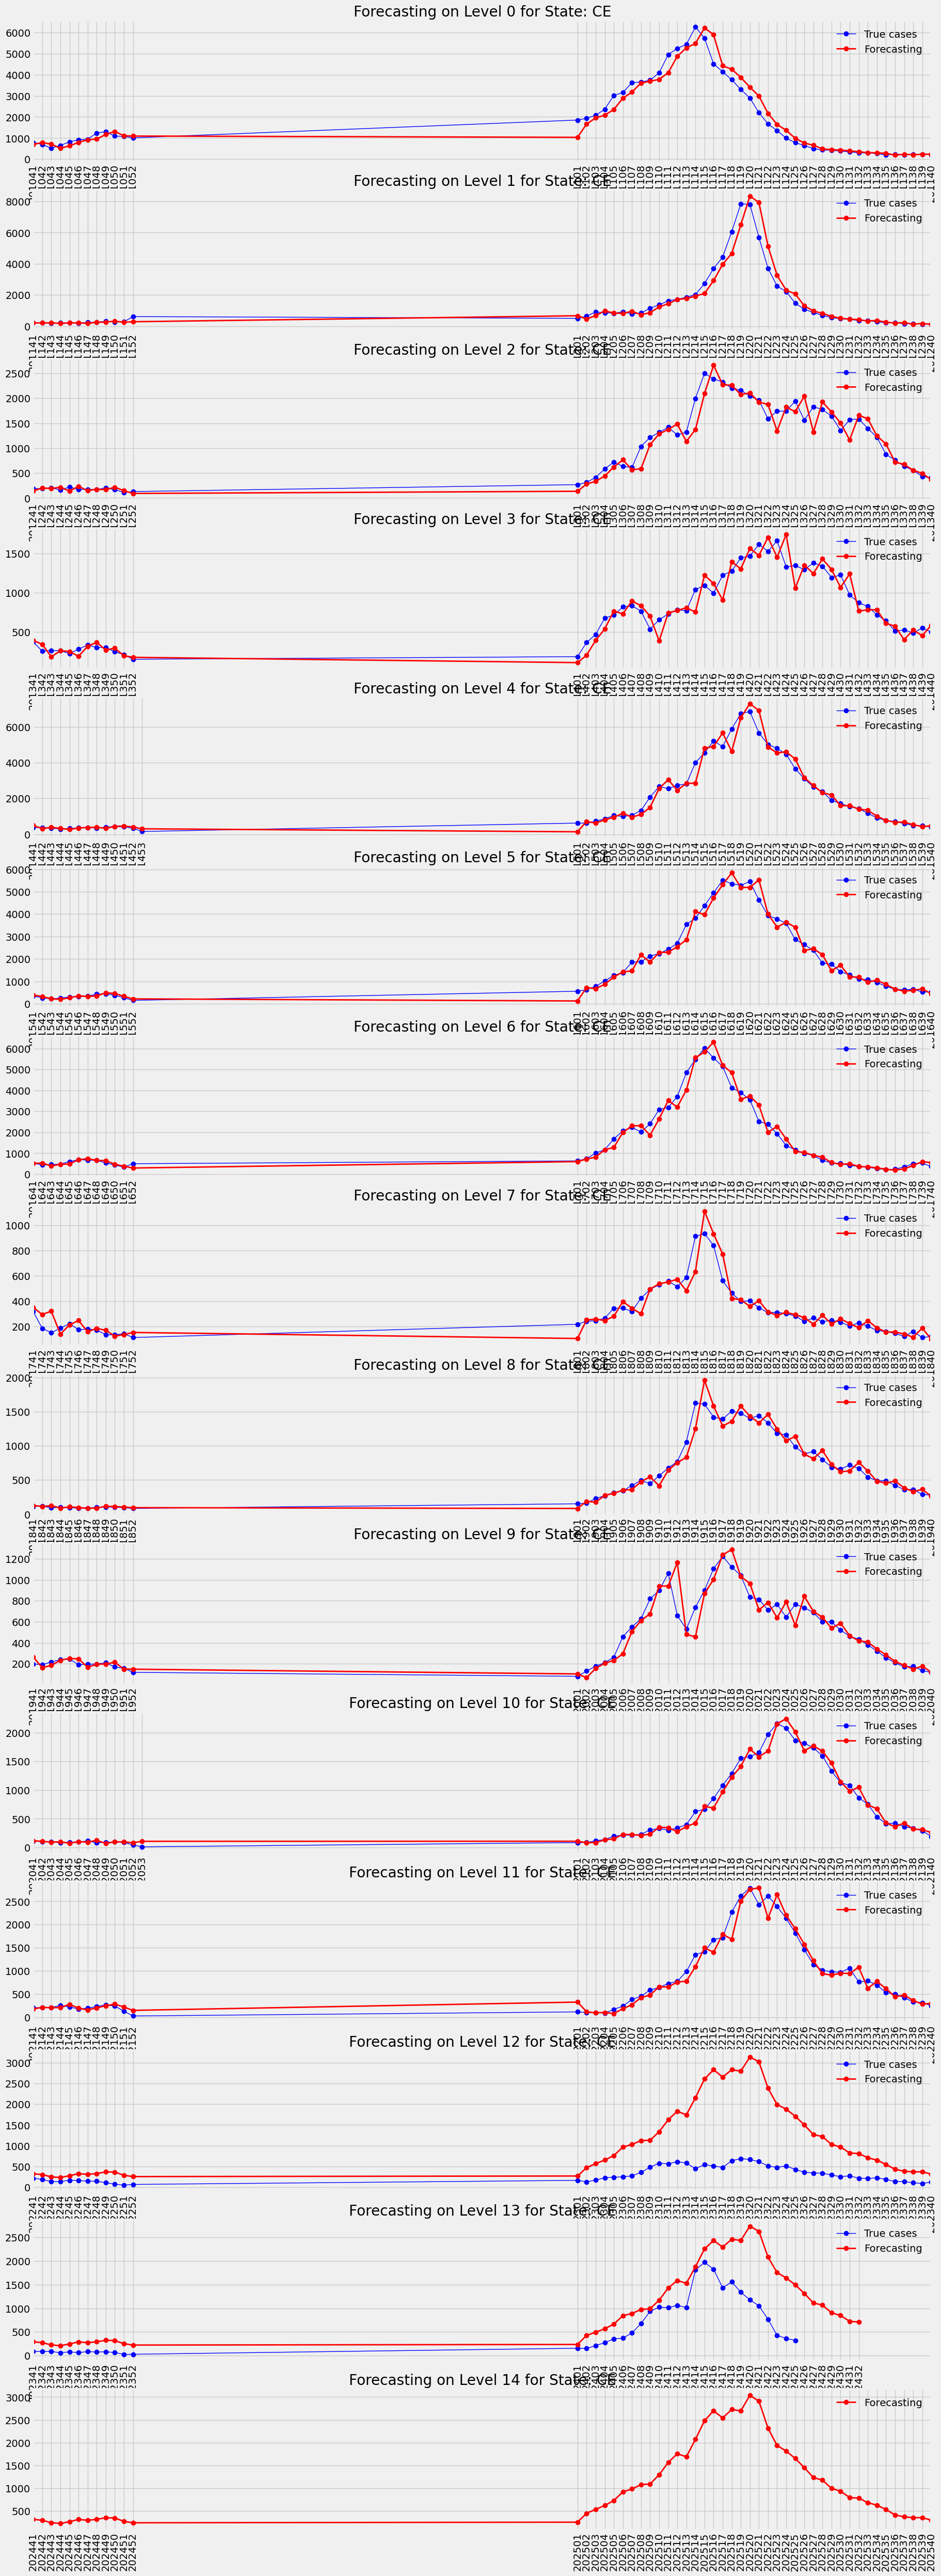

no_of_levels : 15
n_steps: 1
X shape: (755, 2)
X_train shape: (755, 1, 2)
y_train shape: (755,)
X_test shape: (52, 1, 2)
Total MSE on the Prediction : 862202.2173787651 when L is 1


<Figure size 1000x500 with 0 Axes>

File saved as: /content/drive/MyDrive/Colab Notebook/Colab Notebook/infodengue2024/info_dengue_data_and_model_forecast_submission_september_2024/CE_test1.csv
         date        pred  lower       upper adm_1
0  2022-10-09  322.132934    0.0  769.681062    CE
1  2022-10-16  302.621805    0.0  750.169932    CE
2  2022-10-23  246.840182    0.0  694.388309    CE
3  2022-10-30  232.450555    0.0  679.998683    CE
4  2022-11-06  274.614503    0.0  722.162631    CE
File saved as: /content/drive/MyDrive/Colab Notebook/Colab Notebook/infodengue2024/info_dengue_data_and_model_forecast_submission_september_2024/CE_test2.csv
         date        pred  lower       upper adm_1
0  2023-10-08  292.393213    0.0  739.941340    CE
1  2023-10-15  272.887999    0.0  720.436127    CE
2  2023-10-22  225.614480    0.0  673.162608    CE
3  2023-10-29  208.480490    0.0  656.028618    CE
4  2023-11-05  245.441526    0.0  692.989654    CE
File saved as: /content/drive/MyDrive/Colab Notebook/Colab Notebook/info

In [29]:
# final ensemble of hybrid CNN-LSTM model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, Input
from tensorflow.keras.optimizers import Adam
from math import sqrt
from keras.layers import LSTM, Dense, Input
import os
import csv
from numpy.lib import pad

# need to change here for different locations
model_name= 'HYBRID_CNN_LSTM_RMSE_ENSEMBLE_MODEL'
selected_state_name = 'CE'
no_of_levels        = 15  # Updated to include levels up to 15
dfm                 = df[['epiweek', selected_state_name]]
# Penalty on the error
L = 1

# Define the function to create training and validation splits
def training_splits(df, levels):
    splits = []
    for i in range(1, levels + 1):
        x_start = 201001
        x_end = 201000 + (26 + (i - 1) * 100)
        y_start = 201040 + (100 * (i - 1))
        y_end = y_start + 100
        x_split = df[df['epiweek'].between(x_start, x_end)]
        y_split = df[df['epiweek'].between(y_start, y_end)]
        splits.append((x_split, y_split))
    return splits

# Function to split a univariate sequence
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


# Create splits for the defined levels
splits = training_splits(dfm, no_of_levels)

def compute_elementwise_average(arrays):
    # Convert the list of arrays into a 3D numpy array
    stacked_arrays = np.stack(arrays, axis=0)

    # Compute the mean across the new dimension (axis=0)
    average_array = np.mean(stacked_arrays, axis=0)

    return average_array

# this padding helps us to adjust the data if there is any dimension mismatch issue, for example when i=5 dim = 52, in other case 52
def pad_arrays(arrays, target_shape):
    padded_arrays = [pad(array, [(0, target_shape[k] - array.shape[k]) for k in range(len(target_shape))], mode='constant') for array in arrays]
    return padded_arrays


def calculate_weights(rmse_scores):
    penalties = 1 / np.array(rmse_scores)
    total_penalty = np.sum(penalties)
    weights = penalties / total_penalty
    return weights

# def ensemble_predictions(prediction_vectors, weights):
#     prediction_vectors = np.array(prediction_vectors)
#     weighted_sum = np.sum(prediction_vectors * weights[:, np.newaxis], axis=0)
#     return weighted_sum

def ensemble_predictions(prediction_vectors, weights):
    """
    Compute the weighted average of prediction vectors from different models.

    Parameters:
    prediction_vectors (list of np.array): List of prediction vectors from different models.
    weights (np.array): Weights for each model.

    Returns:
    np.array: Final ensemble prediction vector.
    """
    # Convert list of prediction vectors to a numpy array with shape (num_models, num_samples, 1)
    prediction_vectors = np.array(prediction_vectors)

    # Ensure weights is a 1D array with shape (num_models,)
    weights = np.array(weights)

    # Reshape weights to (num_models, 1, 1) to align with prediction_vectors shape (num_models, num_samples, 1)
    weights = weights[:, np.newaxis, np.newaxis]

    # Compute the weighted sum
    weighted_sum = np.sum(prediction_vectors * weights, axis=0)

    return weighted_sum


# Initialize lists to store forecasts and training data
all_model_forecasts              = []
all_X_trains                     = []
all_prev_level_X_pred            = []
all_prev_level_true_data         = []
all_model_r2_score               = []
all_model_forecasting_r2_score   = []
# Create subplots

# Function to define and compile CNN-LSTM model
def build_cnn_lstm_model(filters, kernel_size, learning_rate, n_steps, n_features):
    model = Sequential()
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(n_steps, n_features)))
    model.add(Conv1D(filters=filters//2, kernel_size=kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=1))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(30))
    model.add(Dense(10))
    model.add(Dense(1))
    opt = Adam(learning_rate=learning_rate)
    model.compile(optimizer=opt, loss='mse', metrics=['accuracy'])
    return model



fig, ax = plt.subplots(len(splits), 1, figsize=(20, 60))

if len(splits) == 1:
    ax = [ax]

# Initialize a variable to store residuals from the previous level
previous_residuals = np.zeros(25)
# Initialize mse score for each training
mse_scores  = []

# Choose a number of time steps
n_steps       = 1
n_seq         = 1
n_features    = 2
filters_vec = [32, 64, 128, 256, 512]
# filters_vec = [128, 256]
# filters_vec = [128]

# Define ensemble parameters

for i, (train, val) in enumerate(splits):
    train_new_data = train[selected_state_name].to_numpy()
    val_new_data = val[selected_state_name].to_numpy()
    X, y = split_sequence(train_new_data, n_steps)
    print("Shape before reshaping:", X.shape)
    y_start = 201041 + (100 * (i))
    y_end = y_start + 99

    # Handling X for different levels
    if i == 0:
        # For level 0, the second column is zeros
        zero_feature = np.zeros((X.shape[0], 1))
        X = np.concatenate((X, zero_feature), axis=1)
    else:
        new_index = splits[i-1][0].shape[0]-1
        print(new_index)
        X = np.concatenate((X[:, :1], previous_residuals[0:len(X[:, :1])].reshape(-1, 1)), axis=1)  # Ensure two columns
    # print(i)
    # print(X)
    n_features = X.shape[1]                                                                         # Adjusted to handle multiple features
    num_output_features = 1
    X_train = X
    y_train = y

    if 0 <= i < 12:
        X_test, y_test = split_sequence(val_new_data, n_steps)
        X_test_zero_feature = np.zeros((X_test.shape[0], 1))
        X_test = np.concatenate((X_test, X_test_zero_feature), axis=1)

    elif i == 12:
        # calculate fake_X_pred
        average = []
        # Determine the target shape (e.g., max shape among arrays)
        target_shape = tuple(max(arr.shape[l] for arr in all_prev_level_X_pred[:i]) for l in range(len(all_prev_level_X_pred[0].shape)))

        # Pad arrays and compute average
        padded_arrays = pad_arrays(all_prev_level_X_pred[:i], target_shape)
        average = compute_elementwise_average(padded_arrays)
        if len(average) == 53:
          average = average[:-1]
        else:
          average  = average
        fake_X_pred_12 = average
        X_test =  fake_X_pred_12
        # calculate fake_true_data
        average = []
        # Determine the target shape (e.g., max shape among arrays)
        target_shape = tuple(max(arr.shape[l] for arr in all_prev_level_true_data[:i]) for l in range(len(all_prev_level_true_data[0].shape)))

        # Pad arrays and compute average
        padded_arrays = pad_arrays(all_prev_level_true_data[:i], target_shape)
        average = compute_elementwise_average(padded_arrays)
        if len(average) == 53:
          average = average[:-1]
        else:
          average  = average
        fake_true_data_12 = average
        y_test = fake_true_data_12

    elif i == 13:
        # calculate fake_X_pred
        average = []
        # Determine the target shape (e.g., max shape among arrays)
        target_shape = tuple(max(arr.shape[l] for arr in all_prev_level_X_pred[:i]) for l in range(len(all_prev_level_X_pred[0].shape)))

        # Pad arrays and compute average
        padded_arrays = pad_arrays(all_prev_level_X_pred[:i], target_shape)
        average = compute_elementwise_average(padded_arrays)
        if len(average) == 53:
          average = average[:-1]
        else:
          average  = average

        fake_X_pred_13 = average
        X_test =  fake_X_pred_13

        # calculate fake_true_data
        average = []
        # Determine the target shape (e.g., max shape among arrays)
        target_shape = tuple(max(arr.shape[l] for arr in all_prev_level_true_data[:i]) for l in range(len(all_prev_level_true_data[0].shape)))

        # Pad arrays and compute average
        padded_arrays = pad_arrays(all_prev_level_true_data[:i], target_shape)
        average = compute_elementwise_average(padded_arrays)
        if len(average) == 53:
          average = average[:-1]
        else:
          average  = average
        fake_true_data_13 = average
        y_test = fake_true_data_13

    else:
        # calculate fake_X_pred

        average = []
        # Determine the target shape (e.g., max shape among arrays)
        target_shape = tuple(max(arr.shape[l] for arr in all_prev_level_X_pred[:i]) for l in range(len(all_prev_level_X_pred[0].shape)))

        # Pad arrays and compute average
        padded_arrays = pad_arrays(all_prev_level_X_pred[:i], target_shape)
        average = compute_elementwise_average(padded_arrays)
        if len(average) == 53:
          average = average[:-1]
        else:
          average  = average

        fake_X_pred_14 = average
        X_test =  fake_X_pred_14

        # calculate fake_true_data
        average = []
        # Determine the target shape (e.g., max shape among arrays)
        target_shape = tuple(max(arr.shape[l] for arr in all_prev_level_true_data[:i]) for l in range(len(all_prev_level_true_data[0].shape)))

        # Pad arrays and compute average
        padded_arrays = pad_arrays(all_prev_level_true_data[:i], target_shape)
        average = compute_elementwise_average(padded_arrays)
        if len(average) == 53:
          average = average[:-1]
        else:
          average  = average
        fake_true_data_14 = average
        y_test = fake_true_data_14


    # Ensure X_train and X_test have the correct shape
    X_train = X_train.reshape((X_train.shape[0], n_steps, n_features))
    X_test = X_test.reshape((X_test.shape[0], n_steps, n_features))


    # Ensemble predictions
    ensemble_predictions_vec   = []
    ensemble_rmse_scores_vec   = []
    for j in range(len(filters_vec)):
        filters     = filters_vec[j]
        kernel_size = 1
        learning_rate = 0.0001
        # Build and train the model
        model = build_cnn_lstm_model(filters, kernel_size, learning_rate, n_steps, n_features)
        model.fit(X_train, y_train, epochs=100, validation_split=0.1, batch_size=5, verbose=0)

        # Make predictions and store
        yhat = model.predict(X_test, verbose=0)
        ensemble_predictions_vec.append(yhat)
        if len(yhat)== 52:
          yhat = yhat
        else:
          yhat = yhat[:-1]
        if len(y_test)== 52:
          y_test = y_test
        else:
          y_test = y_test[:-1]
        new_ensemble_rmse_scores = sqrt(mean_squared_error(y_test, yhat))
        ensemble_rmse_scores_vec.append(new_ensemble_rmse_scores)

    # Average ensemble predictions
    mean_ensemble_predictions = np.mean(ensemble_predictions_vec, axis=0)
    ensemble_predictions_vec.append(mean_ensemble_predictions)
    if len(mean_ensemble_predictions)==52:
      mean_ensemble_predictions = mean_ensemble_predictions
    else:
      mean_ensemble_predictions = mean_ensemble_predictions[:-1]
    new_mean_ensemble_rmse_scores = sqrt(mean_squared_error(y_test, mean_ensemble_predictions))
    ensemble_rmse_scores_vec.append(new_mean_ensemble_rmse_scores)
    ensemble_weights     = calculate_weights(ensemble_rmse_scores_vec)
    new_ensemble_predictions = ensemble_predictions(ensemble_predictions_vec, ensemble_weights)


    # # Evaluate the best model
    y_test_regular = y_test

    yhat_regular       = new_ensemble_predictions
    if len(y_test_regular) == len(yhat_regular):
      # print('Best Test RMSE:', sqrt(mean_squared_error(y_test_regular, yhat_regular)))
      # print('Best Test R2 Score:', r2_score(y_test_regular, yhat_regular))
      colect_r2_score = r2_score(y_test_regular, yhat_regular)
    else:
      yhat_regular = yhat_regular[:-1]
      # print('Best Test RMSE:', sqrt(mean_squared_error(y_test_regular, yhat_regular)))
      # print('Best Test R2 Score:', r2_score(y_test_regular, yhat_regular))
      colect_r2_score = r2_score(y_test_regular, yhat_regular)

    all_model_r2_score.append(colect_r2_score)

    if 0<=i <12:
      pred_epiweeks = dfm[dfm['epiweek'].between(y_start, y_end)]['epiweek']
      true_data = dfm[dfm['epiweek'].between(y_start, y_end)][selected_state_name]
      X_pred         = X_test

    # should we chose the true data . Actualy no by assuming that we can not use the true data
    elif i==12:
      pred_epiweeks  =  list(range(202241, 202253)) + list(range(202301, 202341))
      true_data      = fake_true_data_12
      #X_pred         = X_test      # this is the actual in main code
      X_pred        = fake_X_pred_12   # we need to check here
    elif i==13:
      pred_epiweeks  =  list(range(202341, 202353)) + list(range(202401, 202441))
      true_data      = fake_true_data_13
      #X_pred         = X_test      # this is the actual in main code
      X_pred        = fake_X_pred_13   # we need to check here
    else:
      pred_epiweeks =  list(range(202441, 202453)) + list(range(202501, 202541))
      true_data     = fake_true_data_14
      X_pred        = fake_X_pred_14

    if 0<=i<12:
      # print(f'true_data len {len(true_data)}  with i : {i}')
      # print(true_data.values)
      # print(f'X_pred len {len(true_data)}  with i : {i}')
      # print(X_pred)

      # Ensemble predictions
      ensemble_predictions_vec   = []
      ensemble_rmse_scores_vec   = []
      # Loop through ensemble models for the number of ensemble_size
      for j in range(len(filters_vec)):
          filters     = filters_vec[j]
          kernel_size = 1  # Ensure kernel_size <= n_steps
          learning_rate = 0.0001
          # Build and train the model
          model = build_cnn_lstm_model(filters, kernel_size, learning_rate, n_steps, n_features)
          model.fit(X_train, y_train, epochs=100, validation_split=0.1, batch_size=5, verbose=0)

          # Make predictions and store
          yhat = model.predict(X_test, verbose=0)
          ensemble_predictions_vec.append(yhat)
          # new line using ensemble
          #new_ensemble_rmse_scores = sqrt(mean_squared_error(y_test, ensemble_predictions))
          if len(yhat)== 52:
            yhat = yhat
          else:
            yhat = yhat[:-1]
          if len(y_test)== 52:
            y_test = y_test
          else:
            y_test = y_test[:-1]
          new_ensemble_rmse_scores = sqrt(mean_squared_error(y_test, yhat))
          ensemble_rmse_scores_vec.append(new_ensemble_rmse_scores)

      # Average ensemble predictions
      mean_ensemble_predictions = np.mean(ensemble_predictions_vec, axis=0)
      ensemble_predictions_vec.append(mean_ensemble_predictions)
      if len(mean_ensemble_predictions)== 52:
        mean_ensemble_predictions = mean_ensemble_predictions
      else:
        mean_ensemble_predictions = mean_ensemble_predictions[:-1]
      if len(y_test)== 52:
        y_test = y_test
      else:
        y_test = y_test[:-1]
      new_mean_ensemble_rmse_scores = sqrt(mean_squared_error(y_test,  mean_ensemble_predictions))
      ensemble_rmse_scores_vec.append(new_mean_ensemble_rmse_scores)
      ensemble_weights     = calculate_weights(ensemble_rmse_scores_vec)
      new_ensemble_predictions = ensemble_predictions(ensemble_predictions_vec, ensemble_weights)

      model_forecast      = new_ensemble_predictions


      # print(f'model_forecast len {len(model_forecast)}   with i : {i}')
      # print(model_forecast)
      difference = true_data.values  - model_forecast.squeeze()    # model_forecast.squeeze() males an array as we true_data.values - model_forecast
      residuals = difference
      # print(f'residuals for {i} of {len(residuals)}')
      # print(residuals)
      # print(f'X_pred for {i} of {len(X_pred)}')
      # print(X_pred)
    else:
      print(f'true_data len {len(true_data)}  with i : {i}')
      # print(true_data)
      # print(f'X_pred len {len(true_data)}  with i : {i}')
      # print(X_pred)


     # New Ensemble predictions
      ensemble_predictions_vec   = []
      ensemble_rmse_scores_vec   = []
      #for j in range(ensemble_size):
      for j in range(len(filters_vec)):
          filters     = filters_vec[j]
          kernel_size = 1  # Ensure kernel_size <= n_steps
          learning_rate = 0.0001
          # Build and train the model
          model = build_cnn_lstm_model(filters, kernel_size, learning_rate, n_steps, n_features)
          model.fit(X_train, y_train, epochs=100, validation_split=0.1, batch_size=5, verbose=0)

          # Make predictions and store
          yhat = model.predict(X_test, verbose=0)
          ensemble_predictions_vec.append(yhat)
          # new line using ensemble
          #new_ensemble_rmse_scores = sqrt(mean_squared_error(y_test, ensemble_predictions))
          if len(yhat)== 52:
            yhat = yhat
          else:
            yhat = yhat[:-1]
          if len(y_test)== 52:
            y_test = y_test
          else:
            y_test = y_test[:-1]
          new_ensemble_rmse_scores = sqrt(mean_squared_error(y_test, yhat))
          ensemble_rmse_scores_vec.append(new_ensemble_rmse_scores)

      # Average ensemble predictions
      mean_ensemble_predictions = np.mean(ensemble_predictions_vec, axis=0)
      ensemble_predictions_vec.append(mean_ensemble_predictions)
      if len(mean_ensemble_predictions)== 52:
       mean_ensemble_predictions = mean_ensemble_predictions
      else:
       mean_ensemble_predictions = mean_ensemble_predictions[:-1]
      if len(y_test)== 52:
       y_test = y_test
      else:
       y_test = y_test[:-1]
      new_mean_ensemble_rmse_scores = sqrt(mean_squared_error(y_test, mean_ensemble_predictions))
      ensemble_rmse_scores_vec.append(new_mean_ensemble_rmse_scores)
      ensemble_weights     = calculate_weights(ensemble_rmse_scores_vec)
      new_ensemble_predictions = ensemble_predictions(ensemble_predictions_vec, ensemble_weights)

      model_forecast       = new_ensemble_predictions


      # print(f'model_forecast len {len(model_forecast)}   with i : {i}')
      # print(model_forecast)
      if len(true_data)==52:
        true_data = true_data
      else:
        true_data = true_data[:-1]
      if len(model_forecast)==52:
        model_forecast = model_forecast
      else:
        model_forecast = model_forecast[:-1]
      difference = true_data  - model_forecast.squeeze()    # model_forecast.squeeze() males an array as we true_data.values - model_forecast
      residuals = difference
      print(f'residuals for {i} of {len(residuals)}')
      print(residuals)
      print(f'X_pred for {i} of {len(X_pred)}')
      print(X_pred)

    if 0<=i<12:
      X_pred         = X_test
      # Ensure that the shape of residuals matches the second column of X_pred
      if len(X_pred) !=52:
        for l in range(len(X_pred)-1):
            print(f'len(X_pred) is {len(X_pred)} for {i}')
            X_pred[l+1, :, 1] = residuals[l]
      else:
        for l in range(len(X_pred)-1):
            X_pred[l+1, :, 1] = residuals[l]
      # Print the modified X_pred to verify
      print(f'Print the modified X_pred to verify for {i} of {len(X_pred)}')
      print(X_pred)

      # New Ensemble predictions
      ensemble_predictions_vec   = []
      ensemble_rmse_scores_vec   = []
      for j in range(len(filters_vec)):
          filters     = filters_vec[j]
          kernel_size = 1  # Ensure kernel_size <= n_steps
          learning_rate = 0.0001
          # Build and train the model
          model = build_cnn_lstm_model(filters, kernel_size, learning_rate, n_steps, n_features)
          model.fit(X_train, y_train, epochs=100, validation_split=0.1, batch_size=5, verbose=0)

          # Make predictions and store
          yhat = model.predict(X_test, verbose=0)
          ensemble_predictions_vec.append(yhat)
          # new line using ensemble
          if len(yhat)== 52:
            yhat = yhat
          else:
            yhat = yhat[:-1]
          if len(y_test)== 52:
            y_test = y_test
          else:
            y_test = y_test[:-1]
          new_ensemble_rmse_scores = sqrt(mean_squared_error(y_test, yhat))
          ensemble_rmse_scores_vec.append(new_ensemble_rmse_scores)

      # Average ensemble predictions
      mean_ensemble_predictions = np.mean(ensemble_predictions_vec, axis=0)
      ensemble_predictions_vec.append(mean_ensemble_predictions)
      if len(mean_ensemble_predictions)== 52:
        mean_ensemble_predictions = mean_ensemble_predictions
      else:
        mean_ensemble_predictions = mean_ensemble_predictions[:-1]
      if len(y_test)== 52:
        y_test = y_test
      else:
        y_test = y_test[:-1]
      new_mean_ensemble_rmse_scores = sqrt(mean_squared_error(y_test, mean_ensemble_predictions))
      ensemble_rmse_scores_vec.append(new_mean_ensemble_rmse_scores)
      ensemble_weights     = calculate_weights(ensemble_rmse_scores_vec)
      new_ensemble_predictions = ensemble_predictions(ensemble_predictions_vec, ensemble_weights)

      model_forecast       = new_ensemble_predictions

      # print(f'new model_forecast len {len(model_forecast)}   with residual in X_pred i : {i}')
      # print(model_forecast)
      # print(f'residuals for {i} of {len(residuals)}')
      # print(residuals)
      # print(f'X_train {i} of {len(X_train)}')
      # print(X_train)

      # Add model_forecast to list
      all_prev_level_X_pred.append(X_pred)
      # print(f'length of all_prev_level_X_pred data {len(all_prev_level_X_pred)} for {i}')
      # print(all_prev_level_X_pred)
      all_prev_level_true_data.append(true_data)

    else:
      if i==12:
        forecasting_y_start = 202241
        forecasting_y_end   = 202340
        forecasting_true_data_level_12     = dfm[dfm['epiweek'].between(forecasting_y_start, forecasting_y_end)][selected_state_name]
        # update the true date
        all_prev_level_true_data.append(forecasting_true_data_level_12)
        pred_X_start = 202240
        pred_X_end   = 202339
        new_X_pred_level_12     = dfm[dfm['epiweek'].between(pred_X_start, pred_X_end)][selected_state_name]
        formatted_data = np.array([[[value, 0]] for value in new_X_pred_level_12])
        # print(formatted_data)
        for l in range(len(formatted_data)-1):
          formatted_data[l+1, :, 1] = residuals[l]
        real_X_pred_at_level_12 = formatted_data[:]
        # update the X_pred
        all_prev_level_X_pred.append(real_X_pred_at_level_12)

      elif i==13:
        forecasting_y_start = 202341
        forecasting_y_end   = 202440
        forecasting_true_data_level_13     = dfm[dfm['epiweek'].between(forecasting_y_start, forecasting_y_end)][selected_state_name]
        all_prev_level_true_data.append(forecasting_true_data_level_13)
        pred_X_start = 202340
        pred_X_end   = 202432
        new_X_pred_level_13     = dfm[dfm['epiweek'].between(pred_X_start, pred_X_end)][selected_state_name]
        formatted_data = np.array([[[value, 0]] for value in new_X_pred_level_13])
        # print(formatted_data)
        for l in range(len(formatted_data)-1):
          formatted_data[l+1, :, 1] = residuals[l]
        real_X_pred_at_level_13 = formatted_data[:]
        # update the X_pred
        all_prev_level_X_pred.append(real_X_pred_at_level_13)

      else:
        # X_pred = X_pred_new_new_level_13.reshape(-1,1,2)
        X_pred = fake_X_pred_14
        for l in range(len(X_pred)-1):
          X_pred[l+1, :, 1] = residuals[l]

      # Print the modified X_pred to verify
      #print(X_pred)
      all_prev_level_X_pred.append(X_pred)                                      # still we are colecting for the next level
      # print(f'length of all_prev_level_X_pred data {len(all_prev_level_X_pred)} for {i}')
      # print(all_prev_level_X_pred)

      # New Ensemble predictions
      ensemble_predictions_vec   = []
      ensemble_rmse_scores_vec   = []
      # Loop through ensemble models for the number of ensemble_size
      for j in range(len(filters_vec)):
          filters     = filters_vec[j]
          kernel_size = 1  # Ensure kernel_size <= n_steps
          learning_rate = 0.0001
          # Build and train the model
          model = build_cnn_lstm_model(filters, kernel_size, learning_rate, n_steps, n_features)
          model.fit(X_train, y_train, epochs=100, validation_split=0.1, batch_size=5, verbose=0)
          if 0<=i<14:
            X_test = X_pred  # fake_X_pred
          else:
            X_test = fake_X_pred_14
          # Make predictions and store
          yhat = model.predict(X_test, verbose=0)
          ensemble_predictions_vec.append(yhat)
          if len(yhat)== 52:
            yhat = yhat
          else:
            yhat = yhat[:-1]
          if len(y_test)== 52:
            y_test = y_test
          else:
            y_test = y_test[:-1]
          # new line using ensemble
          #new_ensemble_rmse_scores = sqrt(mean_squared_error(y_test, ensemble_predictions))
          new_ensemble_rmse_scores = sqrt(mean_squared_error(y_test, yhat))
          ensemble_rmse_scores_vec.append(new_ensemble_rmse_scores)

    # Add model_forecast to list
    all_model_forecasts.append(model_forecast)
    # forecasting_r_2_score = r2_score(true_data, model_forecast)
    # all_model_forecasting_r2_score.append(forecasting_r_2_score)

    # Store X_train for current level
    all_X_trains.append(X_train.reshape(X_train.shape[0], -1))  # Flatten for saving

    if i == 0:
        previous_residuals = np.concatenate((np.zeros(40), residuals))
    elif 0 < i < 14:
        previous_residuals = np.concatenate((previous_residuals, residuals))
    else:
        previous_residuals = np.concatenate((previous_residuals, residuals))

    # debugging
    print(f'previous_residuals for {i} of {len(previous_residuals)}')
    print(previous_residuals)

    # this is all about the plot
    # np.linspace(1, len(pred_epiweeks),len(pred_epiweeks))
    if 0<=i<12:
      # ax[i].plot(pred_epiweeks, true_data.values, marker='o', linestyle='-', color='blue', linewidth=1, label='True cases')
      # ax[i].plot(pred_epiweeks, model_forecast.squeeze(), marker='o', linestyle='-', color='red', linewidth=2, label='Forecasting')
      ax[i].plot(pred_epiweeks, true_data.values, marker='o', linestyle='-', color='blue', linewidth=1, label='True cases')
      ax[i].plot(pred_epiweeks, model_forecast.squeeze(), marker='o', linestyle='-', color='red', linewidth=2, label='Forecasting')
      # Set x-axis limits and labels
      tick_start = y_start
      tick_end = y_end
      # Adjust the new tick position
      new_tick_positions = np.array(dfm[dfm['epiweek'].between(y_start, y_end)]['epiweek'])
      tick_labels = [f'{int(week):04d}' for week in new_tick_positions]
      ax[i].set_xticks(new_tick_positions)
      ax[i].set_xticklabels(tick_labels, rotation=90)
      ax[i].set_xlim([tick_start, tick_end])
      ax[i].legend(frameon=False)
      ax[i].set_title(f'Forecasting on Level {i} for State: {selected_state_name}')
      print(f'Level {i + 1} - Tick Start: {tick_start}, Tick End: {tick_end}, Positions: {new_tick_positions}')

      # Calculate MSE for the current level
      if len(true_data) == len(model_forecast):
        mse = mean_squared_error(true_data, model_forecast)
      else:
        true_data = true_data[:-1]
        mse = mean_squared_error(true_data, model_forecast)

      mse_scores.append(mse)
      print(f'Mean squared error : {mse} when training level is i : {i}')

    elif i==12:
      forecasting_y_start = 202241
      forecasting_y_end   = 202340
      forecasting_pred_epiweeks = dfm[dfm['epiweek'].between(forecasting_y_start, forecasting_y_end)]['epiweek']
      forecasting_true_data     = dfm[dfm['epiweek'].between(forecasting_y_start, forecasting_y_end)][selected_state_name]
      ax[i].plot(forecasting_pred_epiweeks, forecasting_true_data.values, marker='o', linestyle='-', color='blue', linewidth=1, label='True cases')
      ax[i].plot(forecasting_pred_epiweeks, model_forecast.squeeze(), marker='o', linestyle='-', color='red', linewidth=2, label='Forecasting')
      # ax[i].plot(forecasting_pred_epiweeks, forecasting_true_data, marker='o', linestyle='-', color='blue', linewidth=1, label='True cases')
      # ax[i].plot(forecasting_pred_epiweeks, model_forecast, marker='o', linestyle='-', color='red', linewidth=2, label='Forecasting')
      # Set x-axis limits and labels
      tick_start = forecasting_y_start
      tick_end = forecasting_y_end
      # Adjust the new tick position
      new_tick_positions = np.array(dfm[dfm['epiweek'].between(y_start, y_end)]['epiweek'])
      tick_labels = [f'{int(week):04d}' for week in new_tick_positions]
      ax[i].set_xticks(new_tick_positions)
      ax[i].set_xticklabels(tick_labels, rotation=90)
      ax[i].set_xlim([tick_start, tick_end])
      ax[i].legend(frameon=False)
      ax[i].set_title(f'Forecasting on Level {i} for State: {selected_state_name}')
      print(f'Level {i + 1} - Tick Start: {tick_start}, Tick End: {tick_end}, Positions: {new_tick_positions}')

      # Calculate MSE for the current level
      if len(true_data) == len(model_forecast):
        mse = mean_squared_error(true_data, model_forecast)
      else:
        true_data = true_data[:-1]
        mse = mean_squared_error(true_data, model_forecast)

      mse_scores.append(mse)
      print(f'Mean squared error : {mse} when training level is i : {i}')

      print(f'for {i} forecasting length {len(model_forecast)} and pred length {len(forecasting_pred_epiweeks)}')
      print(model_forecast)
    elif i==13:
      forecasting_y_start = 202341
      forecasting_y_end   = 202440
      true_y_end          = 202425
      forecasting_pred_epiweeks = dfm[dfm['epiweek'].between(forecasting_y_start, forecasting_y_end)]['epiweek']
      forecasting_true_epiweeks = dfm[dfm['epiweek'].between(forecasting_y_start, true_y_end)]['epiweek']
      forecasting_true_data     = dfm[dfm['epiweek'].between(forecasting_y_start, true_y_end)][selected_state_name]
      if len(forecasting_pred_epiweeks) != len(model_forecast):
        model_forecast_short = model_forecast[:len(forecasting_pred_epiweeks)]
      ax[i].plot(forecasting_true_epiweeks, forecasting_true_data, marker='o', linestyle='-', color='blue', linewidth=1, label='True cases')
      ax[i].plot(forecasting_pred_epiweeks[:len(model_forecast_short)], model_forecast_short, marker='o', linestyle='-', color='red', linewidth=2, label='Forecasting')
      #ax[i].plot(forecasting_pred_epiweeks, model_forecast, marker='o', linestyle='-', color='red', linewidth=2, label='Forecasting')
      # Set x-axis limits and labels
      tick_start = forecasting_y_start
      tick_end = forecasting_y_end
      # Adjust the new tick position
      new_tick_positions = np.array(dfm[dfm['epiweek'].between(y_start, y_end)]['epiweek'])
      tick_labels = [f'{int(week):04d}' for week in new_tick_positions]
      ax[i].set_xticks(new_tick_positions)
      ax[i].set_xticklabels(tick_labels, rotation=90)
      ax[i].set_xlim([tick_start, tick_end])
      ax[i].legend(frameon=False)
      ax[i].set_title(f'Forecasting on Level {i} for State: {selected_state_name}')
      print(f'Level {i + 1} - Tick Start: {tick_start}, Tick End: {tick_end}, Positions: {new_tick_positions}')

      # Calculate MSE for the current level
      if len(true_data) == len(model_forecast):
        mse = mean_squared_error(true_data, model_forecast)
      else:
        true_data = true_data[:-1]
        mse = mean_squared_error(true_data, model_forecast)

      mse_scores.append(mse)
      print(f'Mean squared error : {mse} when training level is i : {i}')
      print(f'for {i} forecasting length {len(model_forecast)} and pred length {len(forecasting_pred_epiweeks)}   with i : {i}')
      print(model_forecast)
    else:
      forecasting_y_start = 202441
      forecasting_y_end   = 202540
      # forecasting_pred_epiweeks = dfm[dfm['epiweek'].between(forecasting_y_start, forecasting_y_end)]['epiweek']
      forecasting_pred_epiweeks = [202441, 202442, 202443, 202444, 202445, 202446, 202447, 202448, 202449, 202450,
        202451, 202452, 202501, 202502, 202503, 202504, 202505, 202506, 202507, 202508,
        202509, 202510, 202511, 202512, 202513, 202514, 202515, 202516, 202517, 202518,
        202519, 202520, 202521, 202522, 202523, 202524, 202525, 202526, 202527, 202528,
        202529, 202530, 202531, 202532, 202533, 202534, 202535, 202536, 202537, 202538,
        202539, 202540]
      # Plot the forecasting data if the lengths match
      #if len(forecasting_pred_epiweeks) == len(model_forecast):
      ax[i].plot(forecasting_pred_epiweeks, model_forecast, marker='o', linestyle='-', color='red', linewidth=2, label='Forecasting')
      #else
       ## print(f'forecasting_pred_epiweeks shape: {forecasting_pred_epiweeks.shape}')
          # print(f'model_forecast shape: {model_forecast.shape}')
      # Set x-axis limits and labels
      tick_start = forecasting_y_start
      tick_end = forecasting_y_end
      # Adjust the new tick positions
      new_tick_positions = np.array(forecasting_pred_epiweeks)
      tick_labels = [f'{int(week):04d}' for week in new_tick_positions]
      ax[i].set_xticks(new_tick_positions)
      ax[i].set_xticklabels(tick_labels, rotation=90)
      ax[i].set_xlim([tick_start, tick_end])
      # Add a legend
      ax[i].legend(frameon=False)
      # Set the title
      ax[i].set_title(f'Forecasting on Level {i} for State: {selected_state_name}')
      # Print tick information for debugging
      print(f'Level {i + 1} - Tick Start: {tick_start}, Tick End: {tick_end}, Positions: {new_tick_positions}')

      # Calculate MSE for the current level
      if len(true_data) == len(model_forecast):
        mse = mean_squared_error(true_data, model_forecast)
      else:
        true_data = true_data[:-1]
        mse = mean_squared_error(true_data, model_forecast)

      mse_scores.append(mse)
      print(f'Mean squared error : {mse} when training level is i : {i}')
      print(f'for {i} forecasting length {len(model_forecast)} and pred length {len(forecasting_pred_epiweeks)}   with i : {i}')
      print(model_forecast)
      plt.show()
      # Store X_train for current level
      #all_X_trains.append(X_train.reshape(X_train.shape[0], -1))  # Flatten for saving

# total training mse scores
total_mse_scores_each_L = sum(mse_scores)

print(f'no_of_levels : {no_of_levels}')
print(f'n_steps: {n_steps}')
print(f'X shape: {X.shape}')
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
# print(f'y_test shape: {y_test.shape}')
print(f'Total MSE on the Prediction : {total_mse_scores_each_L} when L is {L}')
plt.tight_layout()
plt.show()


# Save the Data
# Define the directory paths
#forecast_dir = '/content/drive/MyDrive/Colab Notebook/Colab Notebook/infodengue2024/info_dengue_data_and_model'
forecast_dir = '/content/drive/MyDrive/Colab Notebook/Colab Notebook/infodengue2024/info_dengue_data_and_model_forecast_submission_september_2024'

# Create directories if they do not exist
if not os.path.exists(forecast_dir):
    os.makedirs(forecast_dir)

# selected_state_name = 'GO'
# Method 1: Flattening
all_residuals_output = X_train[:, :, 1].flatten()
new_X_train = X_train[:, :, 1]


# Define the file paths
x_train_path = os.path.join(forecast_dir, f'{selected_state_name}_{model_name}_all_X_train.csv')
all_residuals_output_path = os.path.join(forecast_dir, f'{selected_state_name}_{model_name}_all_residuals_output.csv')
forecast_path = os.path.join(forecast_dir, f'{selected_state_name}_{model_name}_all_model_forecasts.csv')
all_model_r2_score_path = os.path.join(forecast_dir, f'{selected_state_name}_{model_name}_all_model_r2_score.csv')


#save all_model_forecasts to CSV in row vector
# with open(forecast_path, 'w', newline='') as file:
#      writer = csv.writer(file)
#      for forecast in all_model_forecasts:
#          writer.writerow(forecast.flatten())


#save all_model_forecasts to CSV in column vector
max_len = max(arr.shape[0] for arr in all_model_forecasts)  # Determine the maximum length
# Pad arrays to have the same length
padded_forecasts = []
for arr in all_model_forecasts:
    if arr.shape[0] < max_len:
        # Pad with NaN or another value
        pad_width = max_len - arr.shape[0]
        padded_arr = np.pad(arr, ((0, pad_width), (0, 0)), mode='constant', constant_values=np.nan)
    else:
        padded_arr = arr
    padded_forecasts.append(padded_arr)
# Concatenate the padded arrays
forecasts_2d = np.hstack(padded_forecasts)
with open(forecast_path, 'w', newline='') as file:
    writer = csv.writer(file)
    for forecast in forecasts_2d:
        writer.writerow(forecast.flatten())


# Save all_X_train to CSV
with open(x_train_path, 'w', newline='') as file:
    writer = csv.writer(file)
    for x_train in all_X_trains:
        # Flatten array and save
        writer.writerow(x_train.flatten())

# Save all_X_train to CSV
with open(all_residuals_output_path, 'w', newline='') as file:
    writer = csv.writer(file)
    for x_train in new_X_train:
        # Flatten array and save
        writer.writerow(x_train.flatten())


# Save all_model_r2_scoreto CSV
with open(all_model_r2_score_path, 'w', newline='') as file:
    writer = csv.writer(file)
    for r2_score in all_model_r2_score:
        # Flatten array and save
        writer.writerow(r2_score.flatten())



# save the data again

# 2022-2023 forecasting

dates = [
    "2022-10-09", "2022-10-16", "2022-10-23", "2022-10-30", "2022-11-06", "2022-11-13",
    "2022-11-20", "2022-11-27", "2022-12-04", "2022-12-11", "2022-12-18", "2022-12-25",
    "2023-01-01", "2023-01-08", "2023-01-15", "2023-01-22", "2023-01-29", "2023-02-05",
    "2023-02-12", "2023-02-19", "2023-02-26", "2023-03-05", "2023-03-12", "2023-03-19",
    "2023-03-26", "2023-04-02", "2023-04-09", "2023-04-16", "2023-04-23", "2023-04-30",
    "2023-05-07", "2023-05-14", "2023-05-21", "2023-05-28", "2023-06-04", "2023-06-11",
    "2023-06-18", "2023-06-25", "2023-07-02", "2023-07-09", "2023-07-16", "2023-07-23",
    "2023-07-30", "2023-08-06", "2023-08-13", "2023-08-20", "2023-08-27", "2023-09-03",
    "2023-09-10", "2023-09-17", "2023-09-24", "2023-10-01"
]

# Actual residuals data
residuals = all_X_trains[14][:, 1]

# Calculate standard deviation of residuals
std_residuals = np.std(residuals)

# Define z-score for 90% prediction interval (1.645)
alpha_90_per_pi_z_score = 1.645

# Flatten the forecast data in case it's multidimensional
all_model_forecasts_12 = all_model_forecasts[12].flatten()

# Calculate lower and upper prediction intervals
lower = all_model_forecasts_12 - alpha_90_per_pi_z_score * std_residuals
upper = all_model_forecasts_12 + alpha_90_per_pi_z_score * std_residuals

# Replace zero or negative values in lower bound with a zero value
lower[lower <= 0] = 0  # adjust this threshold as negative

# Replace zero or negative values in lower bound with a zero value
upper[upper <= 0] = 0  # adjust this threshold as negative


# Create the dataframe
df = pd.DataFrame({
    'date': dates,
    'pred': all_model_forecasts_12,
    'lower': lower,
    'upper': upper,
    'adm_1': selected_state_name
})

# Define the directory path and filename
forecast_dir = '/content/drive/MyDrive/Colab Notebook/Colab Notebook/infodengue2024/info_dengue_data_and_model_forecast_submission_september_2024'
csv_filename = f"{forecast_dir}/{selected_state_name}_test1.csv"

# Save the dataframe to the CSV file
df.to_csv(csv_filename, index=False)

print(f"File saved as: {csv_filename}")
print(df.head())  # Display the first few rows



# 2023-2024 forecasting

dates = [
    "2023-10-08", "2023-10-15", "2023-10-22", "2023-10-29", "2023-11-05", "2023-11-12",
    "2023-11-19", "2023-11-26", "2023-12-03", "2023-12-10", "2023-12-17", "2023-12-24",
    "2023-12-31", "2024-01-07", "2024-01-14", "2024-01-21", "2024-01-28", "2024-02-04",
    "2024-02-11", "2024-02-18", "2024-02-25", "2024-03-03", "2024-03-10", "2024-03-17",
    "2024-03-24", "2024-03-31", "2024-04-07", "2024-04-14", "2024-04-21", "2024-04-28",
    "2024-05-05", "2024-05-12", "2024-05-19", "2024-05-26", "2024-06-02", "2024-06-09",
    "2024-06-16", "2024-06-23", "2024-06-30", "2024-07-07", "2024-07-14", "2024-07-21",
    "2024-07-28", "2024-08-04", "2024-08-11", "2024-08-18", "2024-08-25", "2024-09-01",
    "2024-09-08", "2024-09-15", "2024-09-22", "2024-09-29"
]


# Assume the residuals array has been computed or provided (replace with your actual residuals data)
residuals = all_X_trains[14][:, 1]

# Calculate standard deviation of residuals
std_residuals = np.std(residuals)

# Define z-score for 90% prediction interval (1.645)
alpha_90_per_pi_z_score = 1.645

# Flatten the forecast data in case it's multidimensional
all_model_forecasts_13 = all_model_forecasts[13].flatten()

# Calculate lower and upper prediction intervals
lower = all_model_forecasts_13 - alpha_90_per_pi_z_score * std_residuals
upper = all_model_forecasts_13 + alpha_90_per_pi_z_score * std_residuals

# Replace zero or negative values in lower bound with a zero value
lower[lower <= 0] = 0  # adjust this threshold as negative

# Replace zero or negative values in lower bound with a zero value
upper[upper <= 0] = 0  # adjust this threshold as negative


# Create the dataframe
df = pd.DataFrame({
    'date': dates,
    'pred': all_model_forecasts_13,
    'lower': lower,
    'upper': upper,
    'adm_1': selected_state_name
})

# Define the directory path and filename

forecast_dir = '/content/drive/MyDrive/Colab Notebook/Colab Notebook/infodengue2024/info_dengue_data_and_model_forecast_submission_september_2024'
csv_filename = f"{forecast_dir}/{selected_state_name}_test2.csv"

# Save the dataframe to the CSV file
df.to_csv(csv_filename, index=False)

print(f"File saved as: {csv_filename}")
print(df.head())  # Display the first few rows




# 2024-2025 forecasting
dates = [
    "2024-10-06", "2024-10-13", "2024-10-20", "2024-10-27", "2024-11-03", "2024-11-10",
    "2024-11-17", "2024-11-24", "2024-12-01", "2024-12-08", "2024-12-15", "2024-12-22",
    "2024-12-29", "2025-01-05", "2025-01-12", "2025-01-19", "2025-01-26", "2025-02-02",
    "2025-02-09", "2025-02-16", "2025-02-23", "2025-03-02", "2025-03-09", "2025-03-16",
    "2025-03-23", "2025-03-30", "2025-04-06", "2025-04-13", "2025-04-20", "2025-04-27",
    "2025-05-04", "2025-05-11", "2025-05-18", "2025-05-25", "2025-06-01", "2025-06-08",
    "2025-06-15", "2025-06-22", "2025-06-29", "2025-07-06", "2025-07-13", "2025-07-20",
    "2025-07-27", "2025-08-03", "2025-08-10", "2025-08-17", "2025-08-24", "2025-08-31",
    "2025-09-07", "2025-09-14", "2025-09-21", "2025-09-28"
]

# Assume the residuals array has been computed or provided (replace with your actual residuals data)
residuals = all_X_trains[14][:, 1]

# Calculate standard deviation of residuals
std_residuals = np.std(residuals)

# Define z-score for 90% prediction interval (1.645)
alpha_90_per_pi_z_score = 1.645

# Flatten the forecast data in case it's multidimensional
all_model_forecasts_14 = all_model_forecasts[14].flatten()

# Calculate lower and upper prediction intervals
lower = all_model_forecasts_14 - alpha_90_per_pi_z_score * std_residuals
upper = all_model_forecasts_14 + alpha_90_per_pi_z_score * std_residuals

# Replace zero or negative values in lower bound with a zero value
lower[lower <= 0] = 0  # adjust this threshold as negative

# Replace zero or negative values in lower bound with a zero value
upper[upper <= 0] = 0  # adjust this threshold as negative


# Create the dataframe
df = pd.DataFrame({
    'date': dates,
    'pred': all_model_forecasts_14,
    'lower': lower,
    'upper': upper,
    'adm_1': selected_state_name
})

# Define the directory path and filename
forecast_dir = '/content/drive/MyDrive/Colab Notebook/Colab Notebook/infodengue2024/info_dengue_data_and_model_forecast_submission_september_2024'
csv_filename = f"{forecast_dir}/{selected_state_name}_2024_2025.csv"

# Save the dataframe to the CSV file
df.to_csv(csv_filename, index=False)

print(f"File saved as: {csv_filename}")
print(df.head())  # Display the first few rows